### Data Shifting Experiment

### HAM 10000

* [Dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DBW86T)

* [Original Paper](https://www.nature.com/articles/sdata2018161)

In [1]:
%cd ..

/home/datascience/Data Fusion


In [2]:
import os
import numpy as np
import pandas as pd

from src.classifiers import preprocess_data, process_labels, split_data
from src.classifiers import VQADataset
from torch.utils.data import DataLoader
from src.classifiers import train_early_fusion, train_late_fusion

from utils import normalize_embeddings, modify_and_normalize_embeddings, visualize_embeddings

In [3]:
PATH = 'Embeddings_vlm/ham10000/'
FILE = 'embeddings_clip.csv'
DATASET = 'ham10000'

batch_size = 64

multilabel = False

num_epochs = 50

In [4]:
df = pd.read_csv(os.path.join(PATH, FILE))
df.drop(columns=['image_id', 'text'], inplace=True)
df.head()

,dx,split,image_embedding_0,image_embedding_1,image_embedding_2,image_embedding_3,image_embedding_4,image_embedding_5,image_embedding_6,image_embedding_7,...,text_embedding_502,text_embedding_503,text_embedding_504,text_embedding_505,text_embedding_506,text_embedding_507,text_embedding_508,text_embedding_509,text_embedding_510,text_embedding_511
0,nv,train,0.017459,-0.006133,0.042509,0.032119,-0.020298,-0.029999,-0.019345,-0.005980,...,-0.085103,-0.035549,0.022616,0.014842,-0.010682,0.007425,-0.010183,0.059058,0.028891,0.073401
1,nv,train,0.013314,-0.004718,0.036896,0.013657,-0.018710,-0.000790,-0.018275,0.021898,...,-0.024121,0.001504,0.007381,0.028216,-0.033343,-0.007173,0.025764,0.037911,-0.028967,0.032034
2,akiec,train,0.023076,-0.006460,0.046531,-0.007525,-0.052272,0.024759,-0.004904,0.024593,...,-0.076046,-0.025927,0.019258,0.013950,-0.013910,0.000220,-0.016514,0.060165,0.028732,0.068683
3,nv,train,0.002341,-0.042092,0.056254,0.000176,-0.013943,0.011410,0.002411,0.001611,...,-0.017013,-0.020450,0.020093,0.021699,-0.018428,0.018907,0.022027,0.045309,-0.014772,0.017288
4,nv,train,0.012029,-0.003644,0.028491,0.017455,-0.017562,-0.005040,0.016783,0.031028,...,-0.093017,-0.022929,0.013042,0.007998,-0.020830,-0.015631,-0.007309,0.057171,0.030298,0.068561


In [5]:
# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column]
image_columns = [column for column in df.columns if 'image' in column]
label_columns = 'dx'
output_size = len(pd.unique(df[label_columns]))

### Run Experiments

##################################################  Shift -1  ##################################################


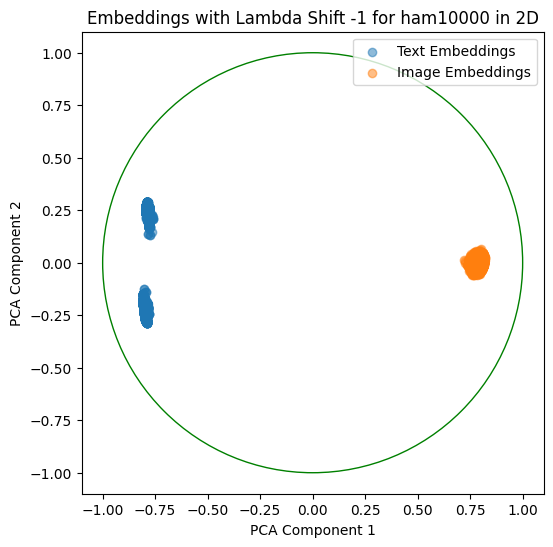

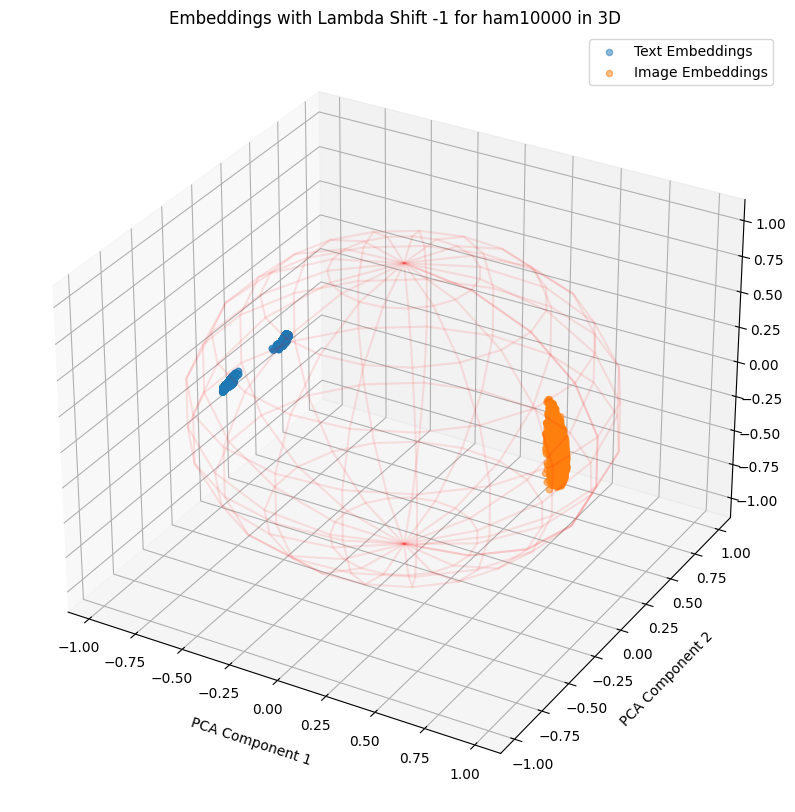

Train Shape: (8012, 1026)
Test Shape: (2003, 1026)
Training Early Fusion Model:
The number of parameters of the model are: 132359
Average Training Time per Epoch: 0.72 seconds
Total Training Time per Epoch: 21.54 seconds
Average Inference Time per Epoch: 0.26 seconds
Total Inference Time per Epoch: 7.80 seconds


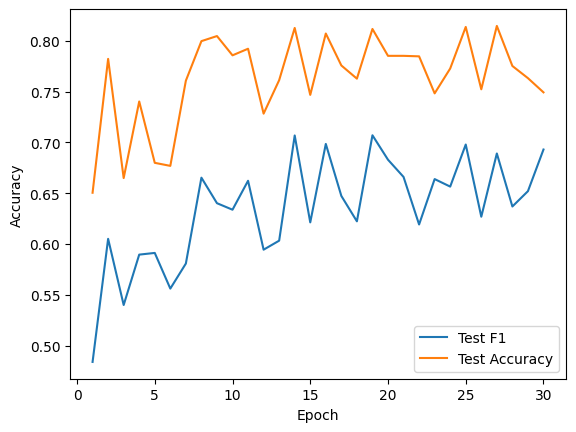

Best Accuracy: {'Acc': 0.8147778332501248, 'F1': 0.6891805146536898, 'Epoch': 27}
Best Macro-F1: {'Acc': 0.8117823265102346, 'F1': 0.7071184896072378, 'Epoch': 19}
Training Late Fusion Model:
The number of parameters of the model are: 66823
Average Training Time per Epoch: 1.03 seconds
Total Training Time per Epoch: 30.79 seconds
Average Inference Time per Epoch: 0.32 seconds
Total Inference Time per Epoch: 9.70 seconds


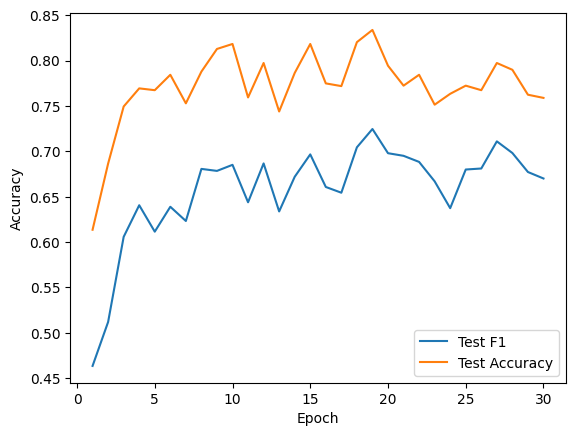

Best Accuracy: {'Acc': 0.8337493759360959, 'F1': 0.724594686836043, 'Epoch': 19}
Best Macro-F1: {'Acc': 0.8337493759360959, 'F1': 0.724594686836043, 'Epoch': 19}
##################################################  Shift -0.5  ##################################################


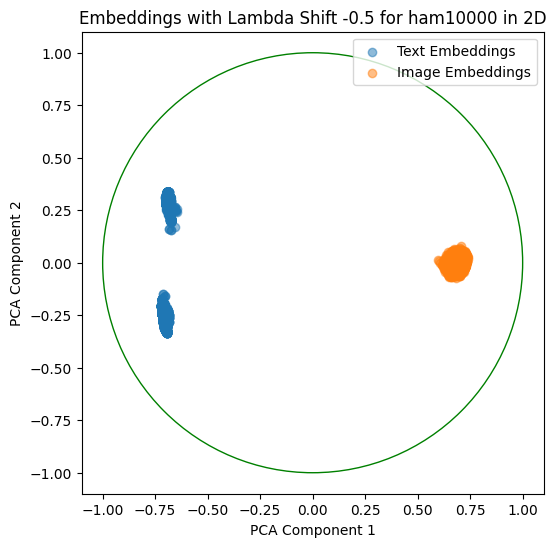

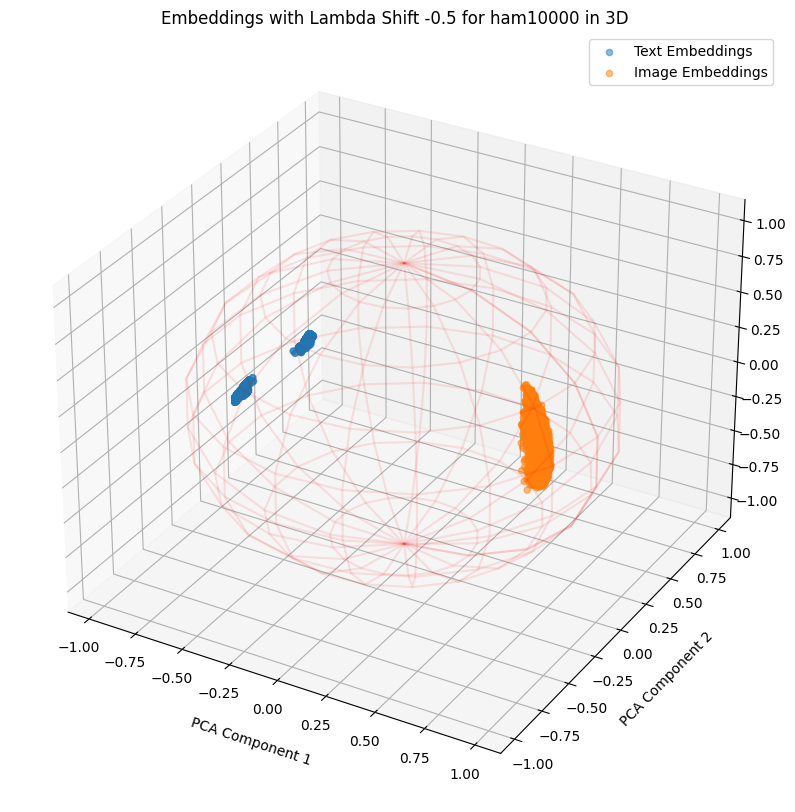

Train Shape: (8012, 1026)
Test Shape: (2003, 1026)
Training Early Fusion Model:
The number of parameters of the model are: 132359
Average Training Time per Epoch: 0.96 seconds
Total Training Time per Epoch: 28.86 seconds
Average Inference Time per Epoch: 0.30 seconds
Total Inference Time per Epoch: 9.02 seconds


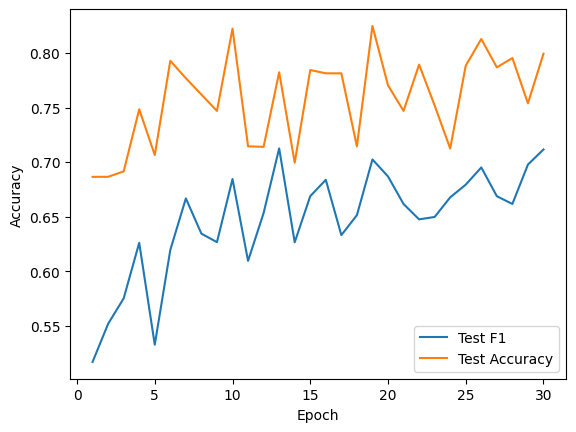

Best Accuracy: {'Acc': 0.8247628557164254, 'F1': 0.7023870318615676, 'Epoch': 19}
Best Macro-F1: {'Acc': 0.782326510234648, 'F1': 0.7125077583771409, 'Epoch': 13}
Training Late Fusion Model:
The number of parameters of the model are: 66823
Average Training Time per Epoch: 1.11 seconds
Total Training Time per Epoch: 33.19 seconds
Average Inference Time per Epoch: 0.31 seconds
Total Inference Time per Epoch: 9.31 seconds


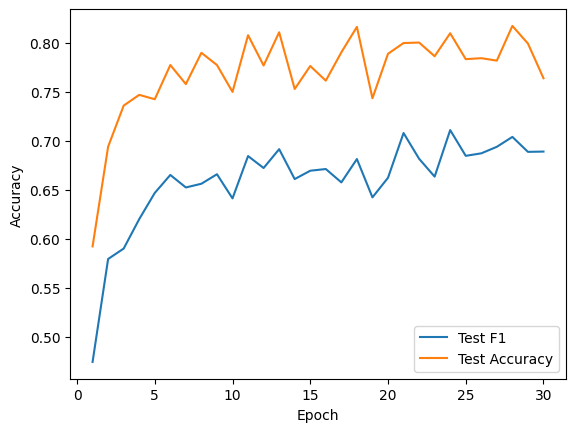

Best Accuracy: {'Acc': 0.8172740888666999, 'F1': 0.7039293659774551, 'Epoch': 28}
Best Macro-F1: {'Acc': 0.8097853220169745, 'F1': 0.7108995793113362, 'Epoch': 24}
##################################################  Shift 0  ##################################################


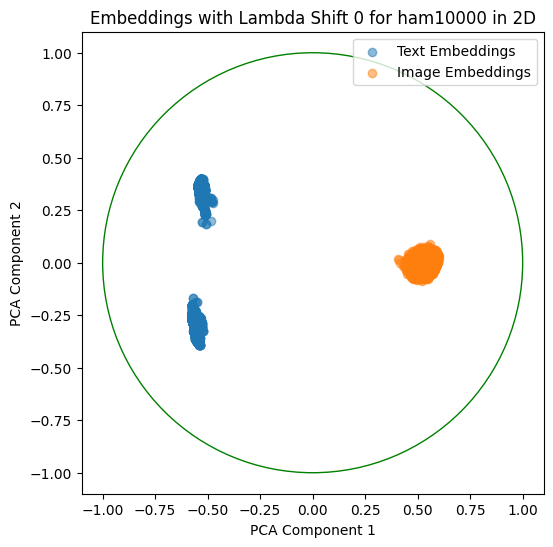

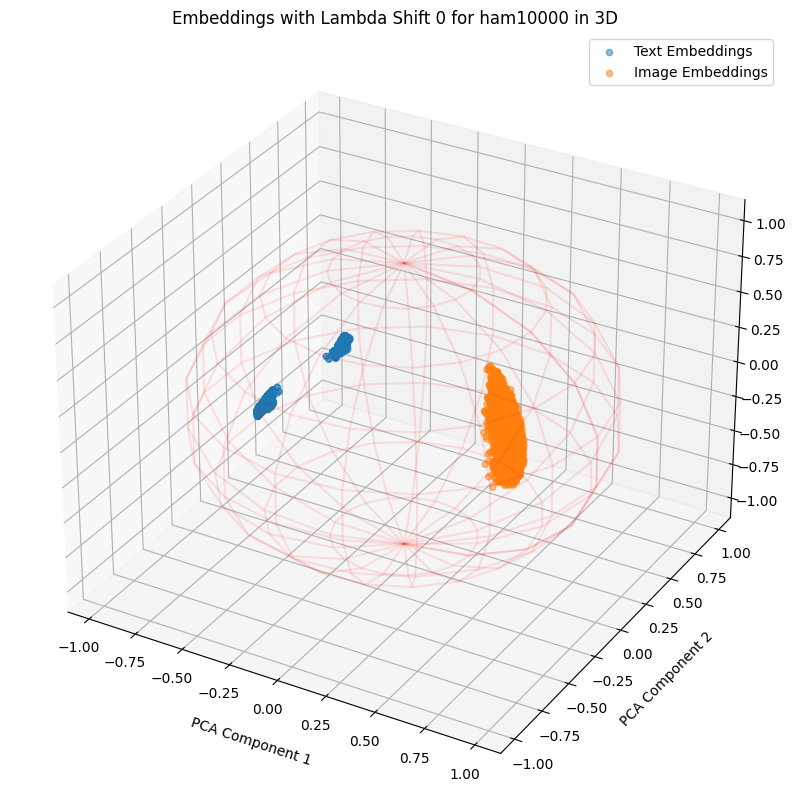

Train Shape: (8012, 1026)
Test Shape: (2003, 1026)
Training Early Fusion Model:
The number of parameters of the model are: 132359
Average Training Time per Epoch: 0.80 seconds
Total Training Time per Epoch: 24.04 seconds
Average Inference Time per Epoch: 0.29 seconds
Total Inference Time per Epoch: 8.58 seconds


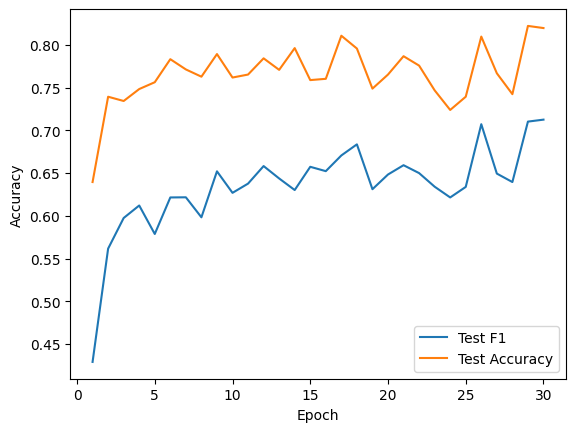

Best Accuracy: {'Acc': 0.8222666000998502, 'F1': 0.7102832697814696, 'Epoch': 29}
Best Macro-F1: {'Acc': 0.8197703444832751, 'F1': 0.7125802085602227, 'Epoch': 30}
Training Late Fusion Model:
The number of parameters of the model are: 66823
Average Training Time per Epoch: 1.30 seconds
Total Training Time per Epoch: 39.12 seconds
Average Inference Time per Epoch: 0.35 seconds
Total Inference Time per Epoch: 10.60 seconds


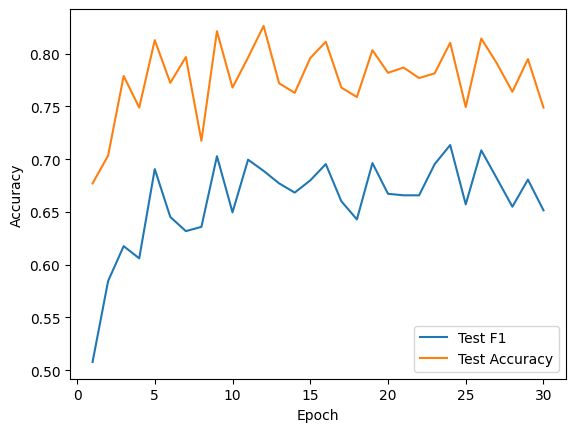

Best Accuracy: {'Acc': 0.8262606090863704, 'F1': 0.688886700562337, 'Epoch': 12}
Best Macro-F1: {'Acc': 0.8102845731402896, 'F1': 0.7134143545026809, 'Epoch': 24}
##################################################  Shift 0.5  ##################################################


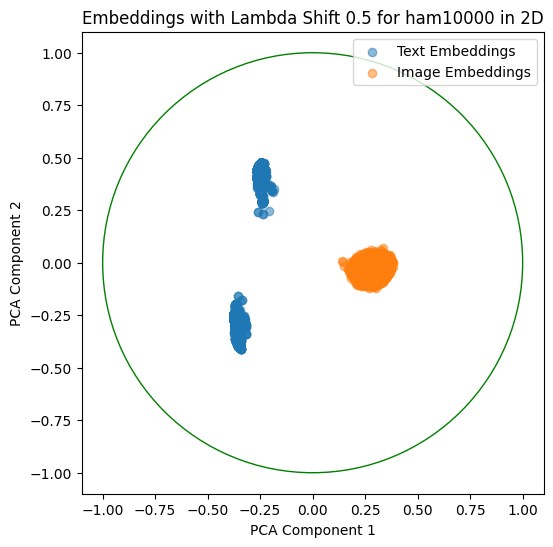

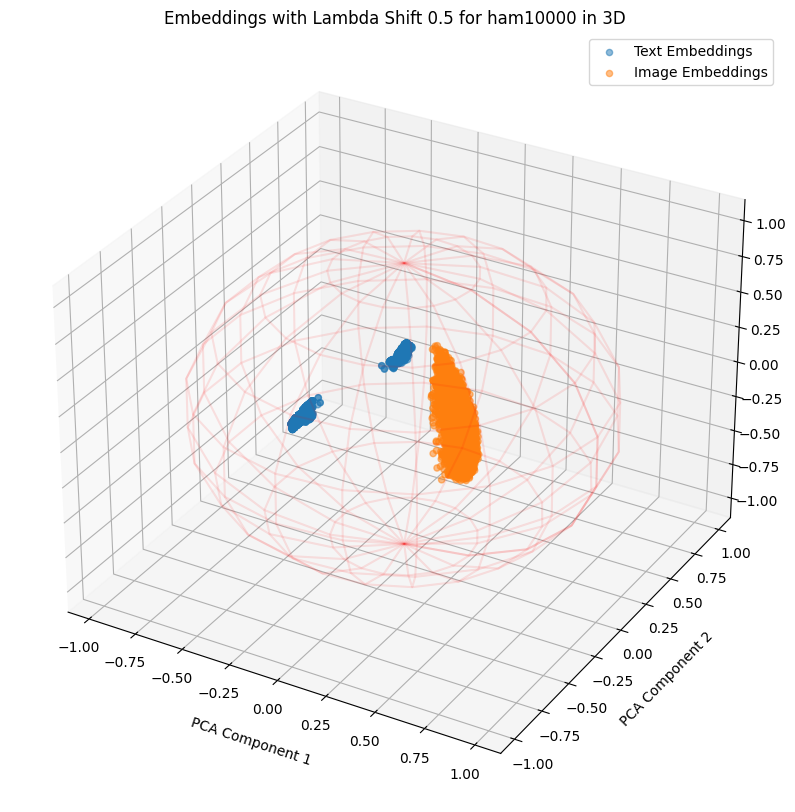

Train Shape: (8012, 1026)
Test Shape: (2003, 1026)
Training Early Fusion Model:
The number of parameters of the model are: 132359
Average Training Time per Epoch: 0.75 seconds
Total Training Time per Epoch: 22.46 seconds
Average Inference Time per Epoch: 0.27 seconds
Total Inference Time per Epoch: 8.19 seconds


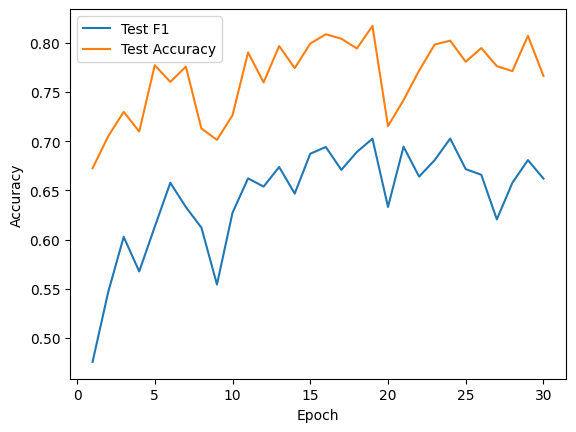

Best Accuracy: {'Acc': 0.8172740888666999, 'F1': 0.7026200946891, 'Epoch': 19}
Best Macro-F1: {'Acc': 0.8022965551672492, 'F1': 0.7027363141138835, 'Epoch': 24}
Training Late Fusion Model:
The number of parameters of the model are: 66823
Average Training Time per Epoch: 1.25 seconds
Total Training Time per Epoch: 37.35 seconds
Average Inference Time per Epoch: 0.31 seconds
Total Inference Time per Epoch: 9.33 seconds


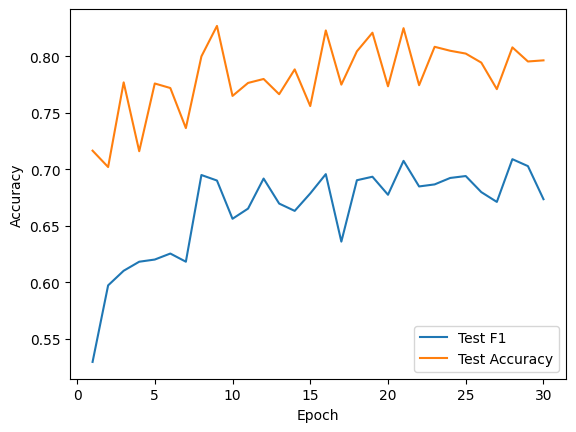

Best Accuracy: {'Acc': 0.8267598602096855, 'F1': 0.6900085552777541, 'Epoch': 9}
Best Macro-F1: {'Acc': 0.8077883175237144, 'F1': 0.7088853407203495, 'Epoch': 28}
##################################################  Shift 1  ##################################################


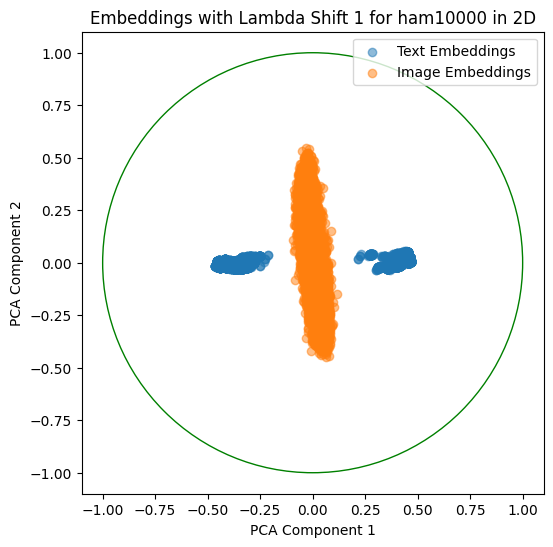

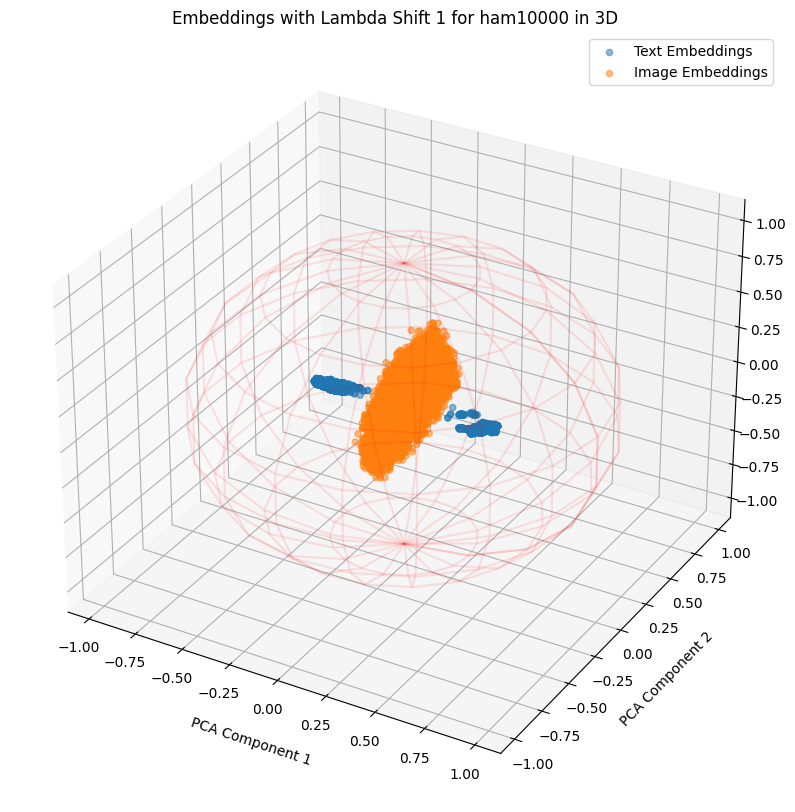

Train Shape: (8012, 1026)
Test Shape: (2003, 1026)
Training Early Fusion Model:
The number of parameters of the model are: 132359
Average Training Time per Epoch: 0.85 seconds
Total Training Time per Epoch: 25.37 seconds
Average Inference Time per Epoch: 0.26 seconds
Total Inference Time per Epoch: 7.72 seconds


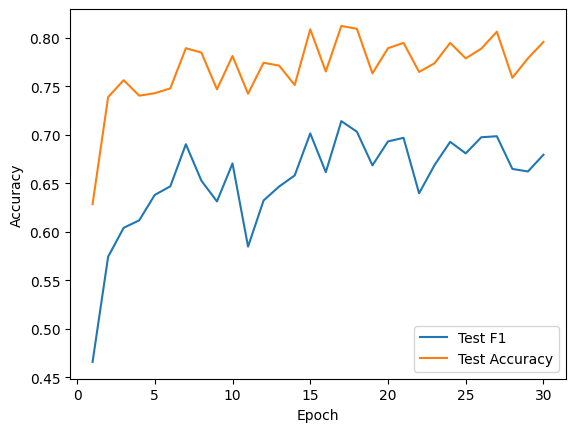

Best Accuracy: {'Acc': 0.8122815776335497, 'F1': 0.7141221528778228, 'Epoch': 17}
Best Macro-F1: {'Acc': 0.8122815776335497, 'F1': 0.7141221528778228, 'Epoch': 17}
Training Late Fusion Model:
The number of parameters of the model are: 66823
Average Training Time per Epoch: 1.11 seconds
Total Training Time per Epoch: 33.17 seconds
Average Inference Time per Epoch: 0.32 seconds
Total Inference Time per Epoch: 9.51 seconds


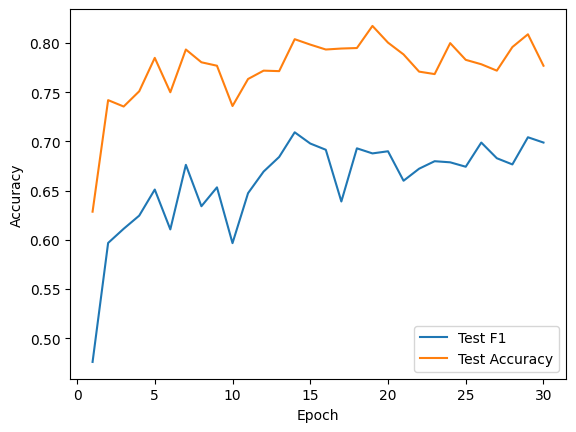

Best Accuracy: {'Acc': 0.8172740888666999, 'F1': 0.6877644789357629, 'Epoch': 19}
Best Macro-F1: {'Acc': 0.8037943085371942, 'F1': 0.709206473948281, 'Epoch': 14}


In [6]:
# Assuming df is your DataFrame
lambda_shift_values = [-1, -0.5, 0, 0.5, 1]  # Negative values push embeddings apart, positive values bring them closer

# Normalize initial embeddings
df[text_columns] = normalize_embeddings(df[text_columns].values)
df[image_columns] = normalize_embeddings(df[image_columns].values)

# Dataframe with shifted values:
df_shifted = df.copy()

results = {}

for lambda_shift in lambda_shift_values:
    
    print('#'*50, f' Shift {lambda_shift} ', '#'*50)
    
    # Extract embeddings
    text_embeddings = df[text_columns].values
    image_embeddings = df[image_columns].values
    
    # Modify and normalize embeddings
    text_embeddings_shifted, image_embeddings_shifted = modify_and_normalize_embeddings(text_embeddings, image_embeddings, lambda_shift)
    
    # Update DataFrame with shifted embeddings
    df_shifted[text_columns] = text_embeddings_shifted
    df_shifted[image_columns] = image_embeddings_shifted
    
    # Visualize shifted embeddings
    visualize_embeddings(text_embeddings_shifted, image_embeddings_shifted, f'Embeddings with Lambda Shift {lambda_shift} for {DATASET}', lambda_shift, DATASET)
    
    # Split the data
    train_df, test_df = split_data(df_shifted)
    
    
    # Process and one-hot encode labels for training set
    train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
    test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)

    train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
    test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    text_input_size = len(text_columns)
    image_input_size = len(image_columns)

    ### Models:

    # Train early fusion model
    print("Training Early Fusion Model:")
    accuracy, precision, recall, f1, best = train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=num_epochs, multilabel=multilabel, report=True, V=False)
    print(f"Best Accuracy: {best['Acc']}")
    print(f"Best Macro-F1: {best['Macro-F1']}")
    
    results[f"early_({lambda_shift})"] = best
    
    # Train late fusion model
    print("Training Late Fusion Model:")
    accuracy, precision, recall, f1, best = train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=num_epochs, multilabel=multilabel, report=True, V=False)
    print(f"Best Accuracy: {best['Acc']}")
    print(f"Best Macro-F1: {best['Macro-F1']}")
    
    results[f"late_({lambda_shift})"] = best

In [7]:
print('Results Early Fusion: ')
for lambda_shift in lambda_shift_values:
    print(f'Shift = {lambda_shift}')
    print(f"Best Accuracy: {results[f'early_({lambda_shift})']['Acc']}")
    print(f"Best F1: {results[f'early_({lambda_shift})']['Macro-F1']}")
    
print('Results Late Fusion: ')
for lambda_shift in lambda_shift_values:
    print(f'Shift = {lambda_shift}')
    print(f"Best Accuracy: {results[f'late_({lambda_shift})']['Acc']}")
    print(f"Best F1: {results[f'late_({lambda_shift})']['Macro-F1']}")

Results Early Fusion: 
Shift = -1
Best Accuracy: {'Acc': 0.8147778332501248, 'F1': 0.6891805146536898, 'Epoch': 27}
Best F1: {'Acc': 0.8117823265102346, 'F1': 0.7071184896072378, 'Epoch': 19}
Shift = -0.5
Best Accuracy: {'Acc': 0.8247628557164254, 'F1': 0.7023870318615676, 'Epoch': 19}
Best F1: {'Acc': 0.782326510234648, 'F1': 0.7125077583771409, 'Epoch': 13}
Shift = 0
Best Accuracy: {'Acc': 0.8222666000998502, 'F1': 0.7102832697814696, 'Epoch': 29}
Best F1: {'Acc': 0.8197703444832751, 'F1': 0.7125802085602227, 'Epoch': 30}
Shift = 0.5
Best Accuracy: {'Acc': 0.8172740888666999, 'F1': 0.7026200946891, 'Epoch': 19}
Best F1: {'Acc': 0.8022965551672492, 'F1': 0.7027363141138835, 'Epoch': 24}
Shift = 1
Best Accuracy: {'Acc': 0.8122815776335497, 'F1': 0.7141221528778228, 'Epoch': 17}
Best F1: {'Acc': 0.8122815776335497, 'F1': 0.7141221528778228, 'Epoch': 17}
Results Late Fusion: 
Shift = -1
Best Accuracy: {'Acc': 0.8337493759360959, 'F1': 0.724594686836043, 'Epoch': 19}
Best F1: {'Acc': 0.83